In [18]:
import cv2
import torch
import numpy as np
from model.emonex.model import EmoNeXt   # import lại kiến trúc bạn đã định nghĩa

num_classes = 7
CLASSES = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
model = EmoNeXt(num_classes=num_classes)
checkpoint = torch.load("checkpoint\checkpoint_EmoNeXt.pt", map_location=torch.device("cpu"))
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2804\1333647821.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("checkpoint\checkpoint_EmoNeXt.pt", m

EmoNeXt(
  (localization): Sequential(
    (0): Conv2d(3, 8, kernel_size=(7, 7), stride=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): ReLU(inplace=True)
  )
  (fc_loc): Sequential(
    (0): Linear(in_features=640, out_features=32, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=32, out_features=6, bias=True)
  )
  (downsample_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm()
    )
    (1): Sequential(
      (0): LayerNorm()
      (1): Conv2d(96, 192, kernel_size=(2, 2), stride=(2, 2))
      (2): SEL

In [19]:
def normalize(img, mean, std):
    img = img.astype(np.float32) / 255.0        # scale về [0,1]
    img = (img - mean) / std
    return img

In [ ]:
img = cv2.imread("sample/Untitled2.png")
img = cv2.resize(img, (48, 48))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)     # shape (48,48)
img = cv2.merge([gray, gray, gray])              # (48,48,3)
mean = np.array([0.5077, 0.5077, 0.5077], dtype=np.float32)
std  = np.array([0.2119, 0.2119, 0.2119], dtype=np.float32)
img = normalize(img, mean, std).astype(np.float32)

In [31]:
img_tensor = torch.from_numpy(img.transpose(2,0,1))
img_tensor = img_tensor.unsqueeze(0)

In [32]:
with torch.no_grad():
    outputs = model(img_tensor)
    predicted = outputs[0].item()

print("Predicted: ", CLASSES[predicted])

Predicted:  Neutral


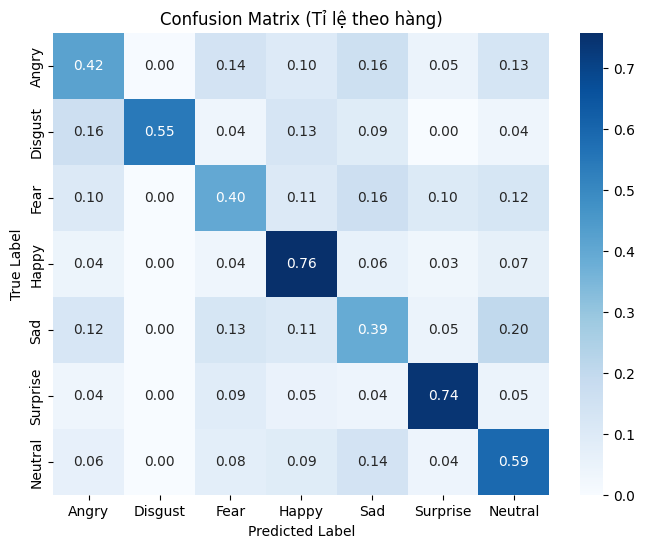

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc confusion_matrix.csv
cm = pd.read_csv("model\emonex\confusion_matrix.csv", index_col=0)
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# Chuẩn hoá theo hàng (tỉ lệ)
cm.index = emotion_labels
cm.columns = emotion_labels
cm_ratio = cm.values.astype(float) / cm.values.sum(axis=1, keepdims=True)
cm_ratio_df = pd.DataFrame(cm_ratio, index=cm.index, columns=cm.columns)

# Vẽ heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_ratio_df, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Confusion Matrix (Tỉ lệ theo hàng)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("TkAgg")
from PIL import Image, ImageTk

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
fig.canvas.manager.set_window_title("Biểu đồ cảm xúc realtime")
root = fig.canvas.manager.window
icon = ImageTk.PhotoImage(Image.open("demo_icon_fixed.png"))
root.iconphoto(False, icon)
ax1.set_axis_off()
ax2.set_axis_off()

# Một khung lớn bên phải (cột 1, chiếm cả 2 hàng)
# ax3 = fig.add_subplot(gs[:, 1])

ax1.set_axis_off()
ax2.set_axis_off()
# ax3.set_axis_off()

# Vẽ thử
ax1.set_title("Khung nhỏ 1 (trái trên)")
ax2.set_title("Khung nhỏ 2 (trái dưới)")
# ax3.set_title("Khung lớn (bên phải)")

plt.tight_layout()
plt.show()

In [3]:
from PIL import Image
img = Image.open("demo_icon.png")
img.save("demo_icon_fixed.png", format="PNG")